In [ ]:
!pip install python-binance
import datetime 
from binance import Client
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.0 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 288 kB 8.9 MB/s 
     |████████████████████████████████| 112 kB 47.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.6 MB/s 
     |████████████████████████████████| 271 kB 46.7 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 20.1 MB/s 
     |████████████████████████████████| 749 kB 38.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [ ]:
import numpy as np

In [ ]:
API_Key="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

Secret_Key="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
#client = Client(API_Key, Secret_Key)
client = Client()

In [ ]:
def historical_ohlcv(Symbol,timeFrame,start_date=(2018,1,1),end_date=(2022,12,31),want_csv=False):
    """
    Kline/Candlestick chart intervals:
    m -> minutes; h -> hours; d -> days; w -> weeks; M -> months
    1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
    
    """
    col=["datetime","open","high","low","close","volume","Close_time","Quote_asset_volume","Number_of_trades","Taker_buy_base_asset_volume","Taker_buy_quote_asset_volume","Ignore"]
    x=datetime.datetime(start_date[0],start_date[1],start_date[2]).timestamp()
    y=datetime.datetime(end_date[0],end_date[1],end_date[2]).timestamp()
    z=client.get_historical_klines(str(Symbol),interval=str(timeFrame),start_str=str(x),end_str=str(y))
    df=pd.DataFrame(z,columns=col)
    df.set_index(["datetime"],inplace=True)
    df.index=pd.to_datetime(df.index,unit="ms")#+datetime.timedelta(minutes=30, hours=5)
    df["open"]=df["open"].astype("float64")
    df["high"]=df["high"].astype("float64")
    df["low"]=df["low"].astype("float64")
    df["close"]=df["close"].astype("float64")
    df["volume"]=df["volume"].astype("float64")
    #df=df[["open","high","low","close","volume"]]
    if want_csv is True :
        df.to_csv("{}_{}.csv".format(Symbol,timeFrame))
    return df
#m=historical_ohlcv("ETHUSDT","1h",start_date=(2018,1,1),end_date=(2021,12,19))

In [ ]:
df=historical_ohlcv("SOLUSDT","1d",start_date=(2015,1,1),end_date=(2022,6,30),want_csv=True)
df

,open,high,low,close,volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore
datetime,,,,,,,,,,,
2020-08-11,2.8500,3.5208,2.8433,3.2985,1552384.78,1597190399999,4939148.93810700,13490,741770.79000000,2370192.68111900,0
2020-08-12,3.2985,3.9289,3.0800,3.7558,1737042.95,1597276799999,6176153.72463800,21118,889133.50000000,3161944.26881700,0
2020-08-13,3.7500,4.1387,3.5003,3.7300,1685759.24,1597363199999,6446567.98049000,22922,716358.46000000,2755764.74800600,0
2020-08-14,3.7207,3.7676,3.3210,3.4099,1474161.79,1597449599999,5205834.09597700,18581,578651.84000000,2048896.65546700,0
2020-08-15,3.4181,3.7400,3.1500,3.1730,1070233.20,1597535999999,3658005.62220200,13903,439623.97000000,1510472.72956800,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,42.2200,42.4900,39.1400,39.3900,4024143.84,1656287999999,164663443.91170000,308030,1885381.29000000,77188468.59970000,0
2022-06-27,39.3900,41.2500,37.9000,38.5200,4172937.40,1656374399999,164427982.22660000,289594,2035849.08000000,80247519.65670000,0
2022-06-28,38.5000,39.9000,35.0200,35.3500,5581335.85,1656460799999,209748465.29870000,361164,2750704.20000000,103481792.18720000,0


In [ ]:
df.describe()

,open,high,low,close,volume,Close_time,Number_of_trades
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,0.000077,0.000092,0.000069,0.000078,1.239367e+12,1.655294e+12,5.003073e+05
std,0.000025,0.000047,0.000019,0.000026,1.048245e+12,8.105038e+08,4.808498e+05
min,0.000047,0.000058,0.000041,0.000047,1.922352e+11,1.653955e+12,6.555600e+04
25%,0.000059,0.000062,0.000056,0.000059,5.458544e+11,1.654625e+12,1.867345e+05
50%,0.000068,0.000076,0.000060,0.000067,9.136657e+11,1.655294e+12,3.159295e+05
75%,0.000093,0.000102,0.000082,0.000093,1.673027e+12,1.655964e+12,6.649802e+05
max,0.000161,0.000290,0.000108,0.000161,4.247335e+12,1.656634e+12,1.830414e+06


In [ ]:
#df=pd.read_csv("ETHUSDT_1h.csv")
#df.set_index(["datetime"],inplace=True)
df

,open,high,low,close,volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore
datetime,,,,,,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,50579.87228839
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,55329.57432378
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,58005.17104565
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,60299.06615403
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,66203.84022245
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,2809.68,2919.87,2794.46,2888.96,488951.24160,1651103999999,1401317315.55232400,669916,246670.35190000,706994610.70957500,0
2022-04-28,2888.95,2980.00,2853.83,2936.93,537392.99780,1651190399999,1567476627.90868300,736818,273351.80610000,797420928.34863700,0
2022-04-29,2936.92,2946.46,2776.63,2817.13,525978.14700,1651276799999,1503869186.33302400,678273,255390.64620000,730762583.36202400,0


In [ ]:
df["returns"]=np.log((df.close)/(df.close.shift(1)))
df["day"]=df.index.day_name()
df["month"]=df.index.month_name()
df

,open,high,low,close,volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,returns,day,month
datetime,,,,,,,,,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,50579.87228839,NaN,Thursday,August
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,55329.57432378,-0.026983,Friday,August
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,58005.17104565,-0.010430,Saturday,August
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,60299.06615403,0.027764,Sunday,August
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,66203.84022245,0.077772,Monday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,2809.68,2919.87,2794.46,2888.96,488951.24160,1651103999999,1401317315.55232400,669916,246670.35190000,706994610.70957500,0,0.027830,Wednesday,April
2022-04-28,2888.95,2980.00,2853.83,2936.93,537392.99780,1651190399999,1567476627.90868300,736818,273351.80610000,797420928.34863700,0,0.016468,Thursday,April
2022-04-29,2936.92,2946.46,2776.63,2817.13,525978.14700,1651276799999,1503869186.33302400,678273,255390.64620000,730762583.36202400,0,-0.041646,Friday,April


In [ ]:
import seaborn as sns

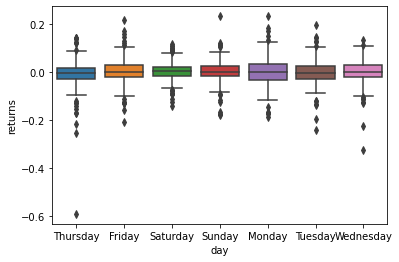

In [ ]:
sns.boxplot(x="day",y="returns",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


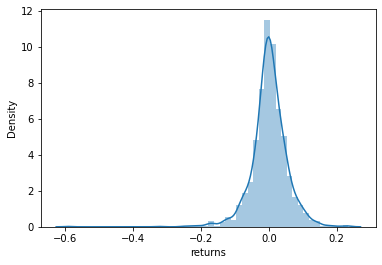

In [ ]:
sns.distplot(df.returns)

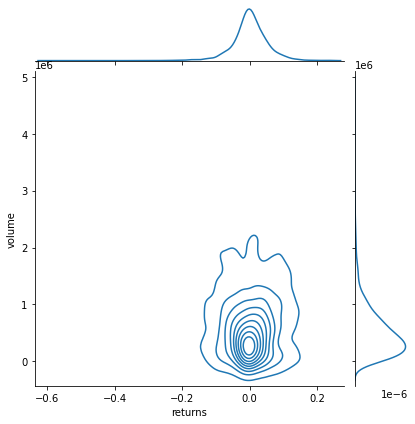

In [ ]:
sns.jointplot(x="returns",y="volume",data=df,kind="kde")

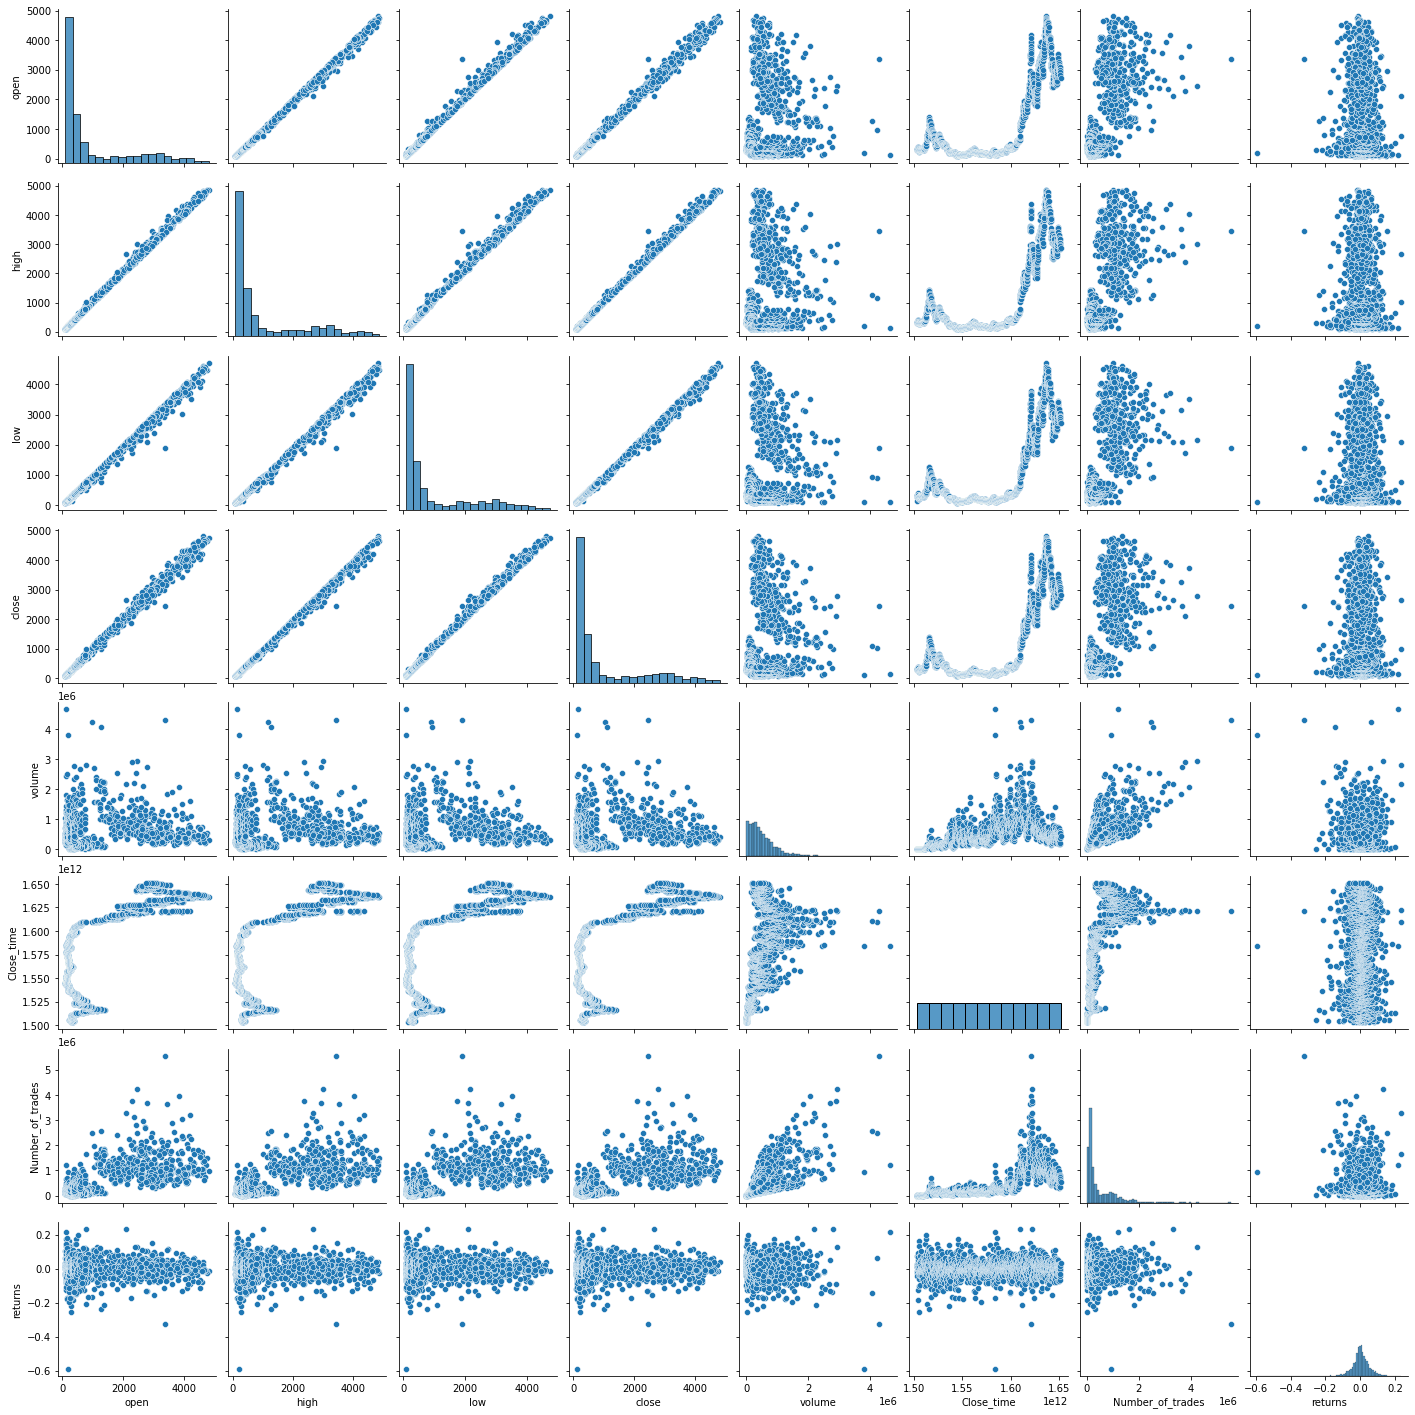

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,open,high,low,close,volume,Close_time,Number_of_trades,returns
open,1.000000,0.999277,0.998229,0.997972,0.134830,0.714306,0.711792,-0.019123
high,0.999277,1.000000,0.998113,0.999013,0.142905,0.713598,0.721567,-0.000161
low,0.998229,0.998113,1.000000,0.998948,0.116098,0.716345,0.691809,0.009008
close,0.997972,0.999013,0.998948,1.000000,0.131148,0.714805,0.708720,0.022599
volume,0.134830,0.142905,0.116098,0.131148,1.000000,0.472031,0.656035,-0.028380
Close_time,0.714306,0.713598,0.716345,0.714805,0.472031,1.000000,0.667503,0.021494
Number_of_trades,0.711792,0.721567,0.691809,0.708720,0.656035,0.667503,1.000000,-0.021206
returns,-0.019123,-0.000161,0.009008,0.022599,-0.028380,0.021494,-0.021206,1.000000


In [ ]:
df_pivot=df.pivot_table(values="returns", index="day", columns="month")
df_pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
day,,,,,,,,,,,,
Friday,0.001673,0.006156,-0.006446,0.026453,0.008503,0.006948,-0.016709,0.013396,-0.008335,0.004221,0.015178,-0.002722
Monday,0.004627,0.005883,0.007727,0.010640,-0.012918,-0.000849,0.002889,0.006001,0.020900,0.000184,0.002032,-0.017121
Saturday,0.004788,0.003075,0.008593,-0.000908,0.020336,0.012574,0.005082,-0.003320,0.009285,0.003469,0.002938,-0.000684
Sunday,0.006635,0.007056,0.019952,-0.022219,0.017597,0.000483,-0.002217,-0.016666,-0.001476,0.009305,-0.000527,0.001344
Thursday,0.018425,0.005788,-0.010495,-0.010936,-0.023559,-0.013991,-0.012466,-0.036411,0.013866,-0.012474,-0.002571,0.001081
Tuesday,0.022892,-0.013409,-0.000845,0.008351,0.012509,-0.012206,-0.011831,0.003193,0.007232,0.004691,-0.004264,-0.016148
Wednesday,0.001207,-0.010727,0.002132,0.004352,0.013818,0.018483,0.014222,-0.002877,-0.013012,-0.002407,0.000066,0.001241


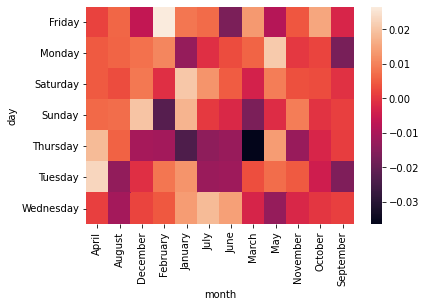

In [ ]:
sns.heatmap(df_pivot)

In [ ]:
df=df[["open","high","low","close"]]
df["down"]=np.where((df.close<df.low.shift(1))&(df.close<df.close.shift(1)),-1,0)
df["up"]=np.where((df.close>df.high.shift(1))&(df.close>df.close.shift(1)),1,0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,open,high,low,close,down,up
datetime,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,0,0
2017-08-18,302.00,311.79,283.94,293.96,-1,0
2017-08-19,293.31,299.90,278.00,290.91,0,0
2017-08-20,289.41,300.53,282.85,299.10,0,0
2017-08-21,299.10,346.52,294.60,323.29,0,1
...,...,...,...,...,...,...
2022-04-27,2809.68,2919.87,2794.46,2888.96,0,0
2022-04-28,2888.95,2980.00,2853.83,2936.93,0,1
2022-04-29,2936.92,2946.46,2776.63,2817.13,-1,0


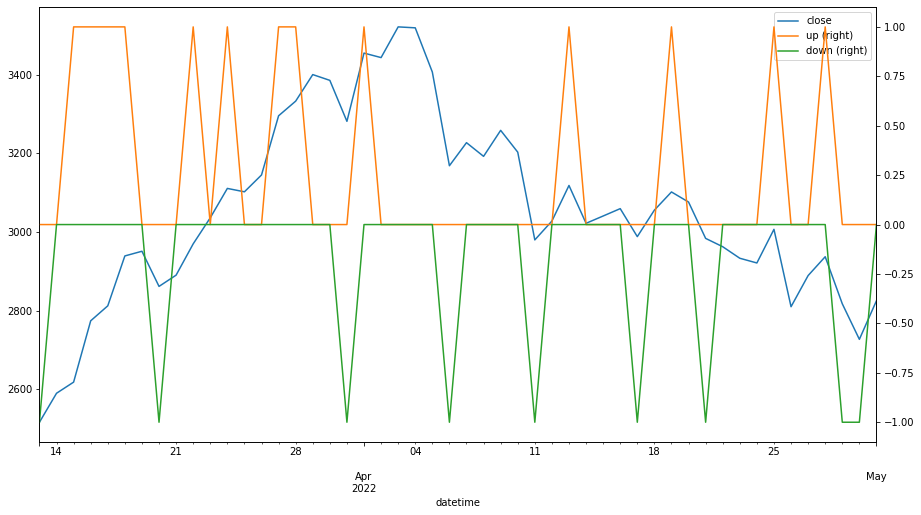

In [ ]:
df[["close","up","down"]].tail(50).plot(figsize=(15,8),secondary_y=["up","down"])

In [ ]:
df["up"].value_counts()

0    1293
1     426
Name: up, dtype: int64

In [ ]:
df["down"].value_counts()

 0    1405
-1     314
Name: down, dtype: int64

In [ ]:
df["up"].value_counts()

0    1293
1     426
Name: up, dtype: int64

In [ ]:
df["down"].value_counts()

 0    1405
-1     314
Name: down, dtype: int64